# Computing Tree Summary Statistics 

This example illustrates how to compute _all_ the summary statistics (i.e., features) included in the `phylomodels.features.trees` module. 

### Import statements

We need just a few Python libraries for running this example. In addition to the few standard libraries (`os`, `pandas`, `matplotlib`), we use `ngesh` for simulating phylogenetic trees, and `phylomodels.features.trees` for computing summary statistics.

In [41]:
# Standard packages
import os
import pandas
import matplotlib
import matplotlib.pyplot as plt

# PhyloModels module for computing tree summary statistics
import phylomodels.features.trees

# Phylogenetic tree simulation (checking here if an installation is required)
try:
    import ngesh
except:
    os.system("pip install " + ngesh)
    import ngesh

### Let's define some parameters for our analysis

Keep in mind that the larger the number of leaves in the simulated trees, the longer it takes to compute the summary statistics.

In [43]:
# Random number generator
seed = 0

# Tree simulation
n_leaves_small = 5
n_leaves_large = 25
birth_rate = 1
death_rate = 0.5

### And now let's generate a few random trees

In [22]:
tree_dict = { "small"             : ngesh.random_tree.gen_tree( min_leaves = n_leaves_small,
                                                                birth      = birth_rate,
                                                                death      = death_rate,
                                                                seed       = seed 
                                                               ),
              "large"             : ngesh.random_tree.gen_tree( min_leaves = n_leaves_large,
                                                                birth      = birth_rate,
                                                                death      = death_rate,
                                                                seed       = seed
                                                               ),
              "double_birth"      : ngesh.random_tree.gen_tree( min_leaves = n_leaves_large,
                                                                birth      = 2*birth_rate,
                                                                death      = death_rate,
                                                                seed       = seed
                                                               ),
              "double_death"      : ngesh.random_tree.gen_tree( min_leaves = n_leaves_large,
                                                                birth      = birth_rate,
                                                                death      = 2*death_rate,
                                                                seed       = seed
                                                               ),
              "double_birthdeath" : ngesh.random_tree.gen_tree( min_leaves = n_leaves_large,
                                                                birth      = 2*birth_rate,
                                                                death      = 2*death_rate,
                                                                seed       = seed
                                                               )
             }

and let's see how the trees look

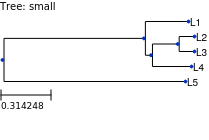

In [44]:
tree_type = "small"
title = "Tree: " + tree_type
ts = ete3.TreeStyle()
ts.title.add_face(  ete3.TextFace(title, fsize=10), column=0 )
tree_dict[tree_type].render("%%inline", tree_style=ts)

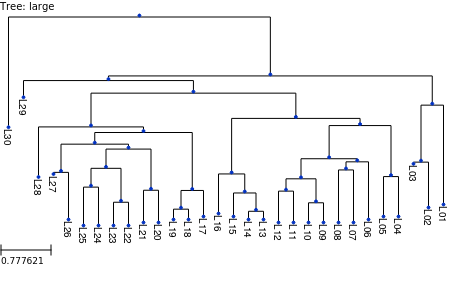

In [24]:
tree_type = "large"
title = "Tree: " + tree_type
ts = ete3.TreeStyle()
ts.title.add_face(  ete3.TextFace(title, fsize=10), column=0 )
ts.rotation = 90
tree_dict[tree_type].render("%%inline", tree_style=ts)

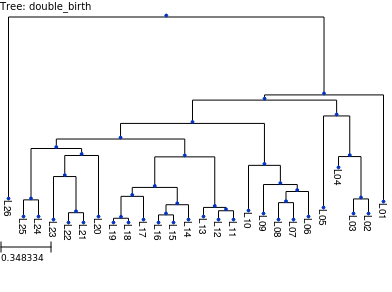

In [25]:
tree_type = "double_birth"
title = "Tree: " + tree_type
ts = ete3.TreeStyle()
ts.title.add_face(  ete3.TextFace(title, fsize=10), column=0 )
ts.rotation = 90
tree_dict[tree_type].render("%%inline", tree_style=ts)

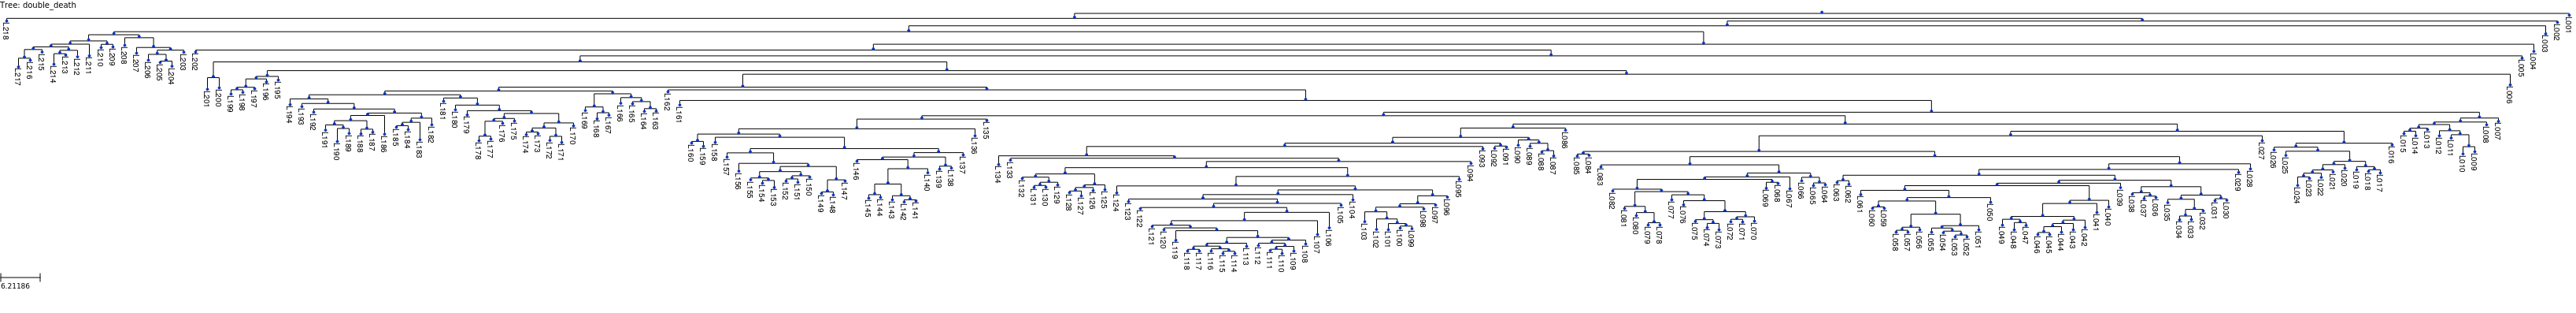

In [26]:
tree_type = "double_death"
title = "Tree: " + tree_type
ts = ete3.TreeStyle()
ts.title.add_face(  ete3.TextFace(title, fsize=10), column=0 )
ts.rotation = 90
tree_dict[tree_type].render("%%inline", tree_style=ts)

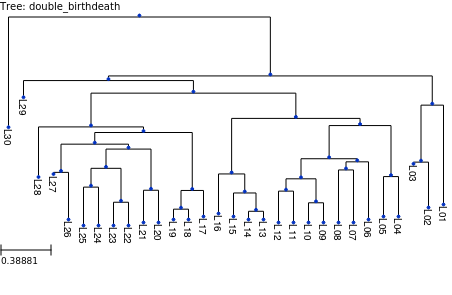

In [27]:
tree_type = "double_birthdeath"
title = "Tree: " + tree_type
ts = ete3.TreeStyle()
ts.title.add_face(  ete3.TextFace(title, fsize=10), column=0 )
ts.rotation = 90
tree_dict[tree_type].render("%%inline", tree_style=ts)

### Now it's time to compute summary statistics

We are interested in _all_ summary statistics in the `phylomodels.features.trees` module. We consolidate the output of all these functions in a single dataframe.  

In [45]:
# Get path to summary statistics definitions
path_to_functions = os.path.dirname( os.path.abspath(phylomodels.features.trees.__file__) )


# Initialize our dataframe of summary statistics
tree_summary_stats = pandas.DataFrame( {"tree_id": tree_dict.keys()} ).set_index("tree_id")


# Let's check all functions that compute summary statistics for trees
for filename in os.listdir( path_to_functions ):
    if filename.startswith("__") or (not filename.endswith(".py")):
        continue

    # Get pointer to function
    function_name = filename[:-3]
    print('... computing: ', function_name)
    this_module = getattr( phylomodels.features.trees, function_name)
    this_function = getattr( this_module, function_name )
        
    # Call function
    out = this_function(tree_dict)
        
    # Update consolidated dataframe
    tree_summary_stats = pandas.concat( [tree_summary_stats, out], axis=1 )
        

# Quickly check what we got
print(tree_summary_stats)    

computing  cluster_mean
computing  WD_ratio
computing  min_adjacency_eigen
computing  tree_height_min
computing  branch_length_max
computing  kurtosis
computing  branch_length_mean_ratio
computing  sackin
computing  cherries
computing  internal_branch_length_max
computing  eigen_gap
computing  branch_length_min_ratio
computing  branch_length_median
computing  LTT_slope_1
computing  frac_basal
computing  external_branch_length_std
computing  eigen_centrality_max
computing  max_laplace_eigen
computing  skewness
computing  mean_path
computing  internal_branch_length_median
computing  LTT_mean_s_time
computing  t_max_lineages
computing  cluster_min
computing  internal_branch_length_min
computing  branch_length_max_ratio
computing  external_branch_length_min
computing  tree_height_mean
computing  betweenness_max
computing  cluster_max
computing  double_cherries

      /-L09
   /-|
  |   \-L10
--|
  |   /-L11
   \-|
      \-L12

      /-L22
   /-|
  |   \-L23
--|
  |   /-L24
   \-|
      \-L

/home/rnunez/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rnunez/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


computing  diameter
computing  external_branch_length_max
computing  branch_length_std
computing  colless
computing  cluster_mode
computing  FurnasR
computing  max_lineages
computing  tree_height_max
computing  branch_length_min
computing  LTT_slope_2
computing  closeness_max
computing  mean_imbalance_ratio
computing  sackin_var
computing  branch_length_mean
computing  LTT_slope_ratio
computing  external_branch_length_median
computing  min_laplace_eigen
computing  internal_branch_length_mean
computing  LTT_mean_b_time
computing  B1
computing  fourprong
computing  max_adjacency_eigen
computing  internal_branch_length_std
computing  external_branch_length_mean
computing  max_dist_lap_eigen
computing  B2
computing  cluster_std
computing  frac_ladder
computing  max_ladder
computing  cluster_num
computing  branch_length_median_ratio
                   cluster_mean  WD_ratio  eigenvalue_min_adj  min_height  \
tree_id                                                                     
small 

### What did we get? Let's check some plots

Text(0, 0.5, 'Summary statistics normalized by values in large tree')

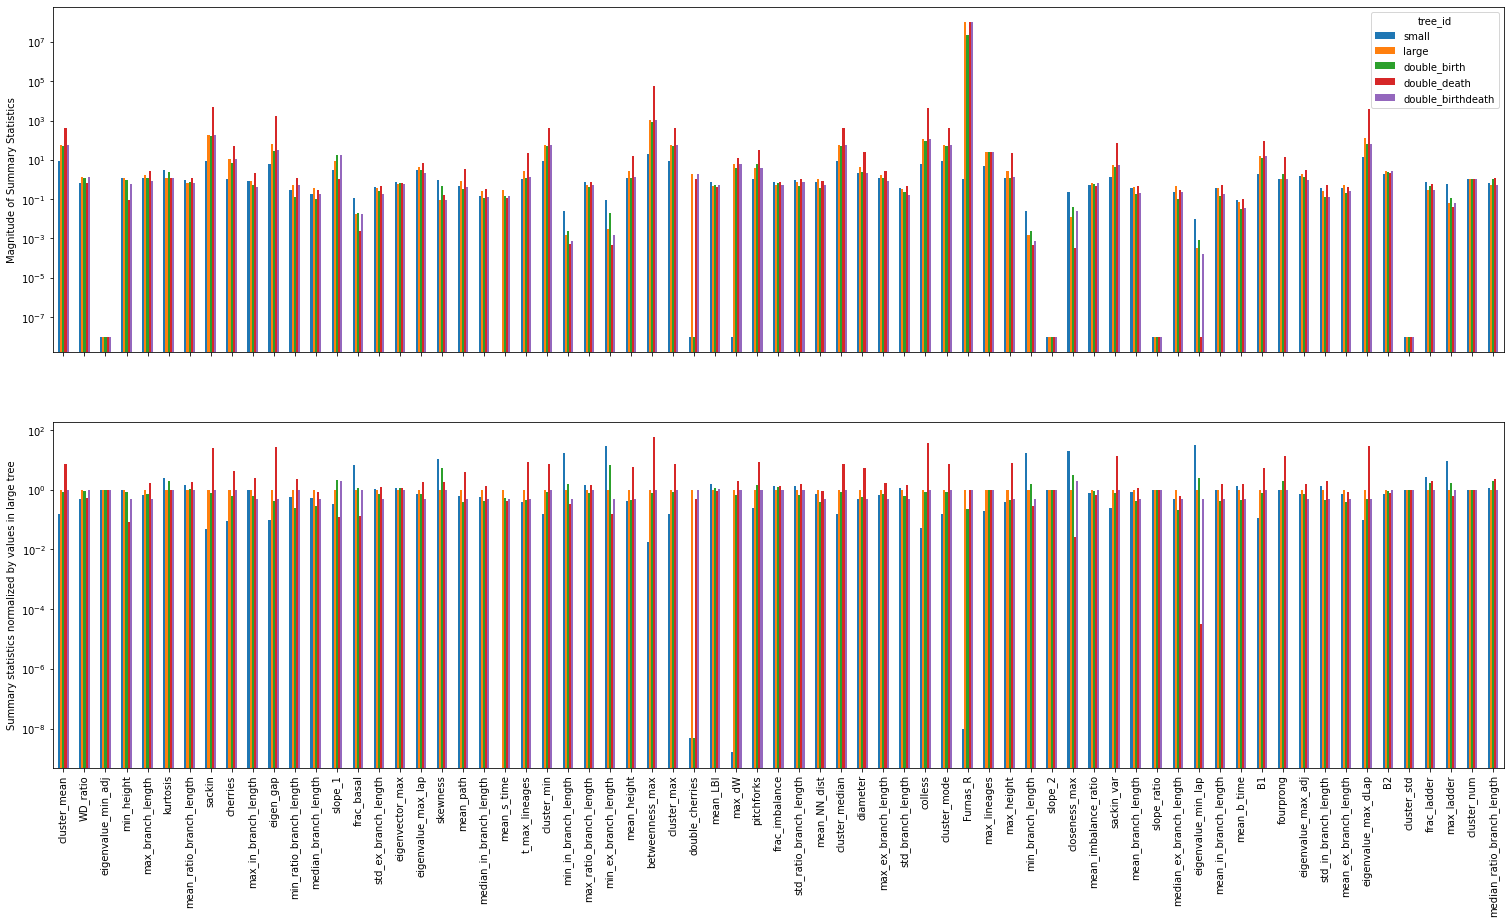

In [47]:
tree_summary_stats = tree_summary_stats.clip(1e-8, 1e8)
reference_column = "large"
tree_summary_stats_normalized = tree_summary_stats.div( tree_summary_stats.loc[reference_column,:] )


fig, axs = plt.subplots(2, 1, figsize=(26,14), sharex=True )
tree_summary_stats.transpose().plot( kind="bar", logy= True, ax=axs[0])
tree_summary_stats_normalized.transpose().plot( kind="bar", logy=True, legend=False, ax=axs[1] )

axs[0].set_ylabel("Magnitude of Summary Statistics")
axs[1].set_ylabel( str("Summary statistics normalized by values in " + reference_column + " tree") )